<a href="https://colab.research.google.com/github/Admiral1172/LinearRegression/blob/main/Ingram_PatrickA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by "Patrick Ingram".

# 1. Load Data and perform basic EDA 
<hr>
<ol type="I">
  <li>import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt) </li>
  <li>import the data to a dataframe and show the count of rows and columns (1 pt)</li>
  <li>Show the top 5 and last 5 rows (1 pt)</li>
  <li>Show how many columns have null values</li>
  <li>Plot the count of target and discuss its imbalances and probably issues and solutions</li>
</ol>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hrdata = pd.read_csv('../content/drive/MyDrive/Colab Notebooks/hrdata2.csv')

In [ ]:
hrdata.shape

(8955, 15)

In [ ]:
hrdata.describe()

,Unnamed: 0,enrollee_id,city_development_index,experience,training_hours,target
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,9527.135008,16869.638749,0.844570,11.635623,65.074930,0.165606
std,5554.606202,9963.804718,0.116178,6.545796,60.235087,0.371747
min,1.000000,2.000000,0.448000,0.000000,1.000000,0.000000
25%,4681.000000,8150.000000,0.794000,6.000000,23.000000,0.000000
50%,9488.000000,16924.000000,0.910000,10.000000,47.000000,0.000000
75%,14419.000000,25902.000000,0.920000,18.000000,88.000000,0.000000
max,19155.000000,33380.000000,0.949000,21.000000,336.000000,1.000000


In [ ]:
hrdata.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [ ]:
hrdata.tail()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0.0


In [ ]:
hrdata.isnull()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8951,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8952,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8953,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


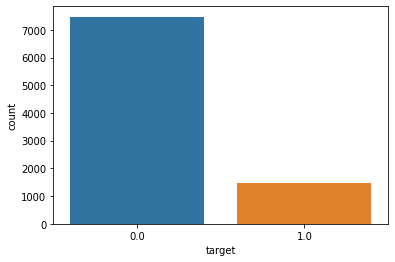

In [ ]:
x_target = hrdata['target']
sns.countplot(x_target)

# 2. Feature Selection and Pre-Processing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


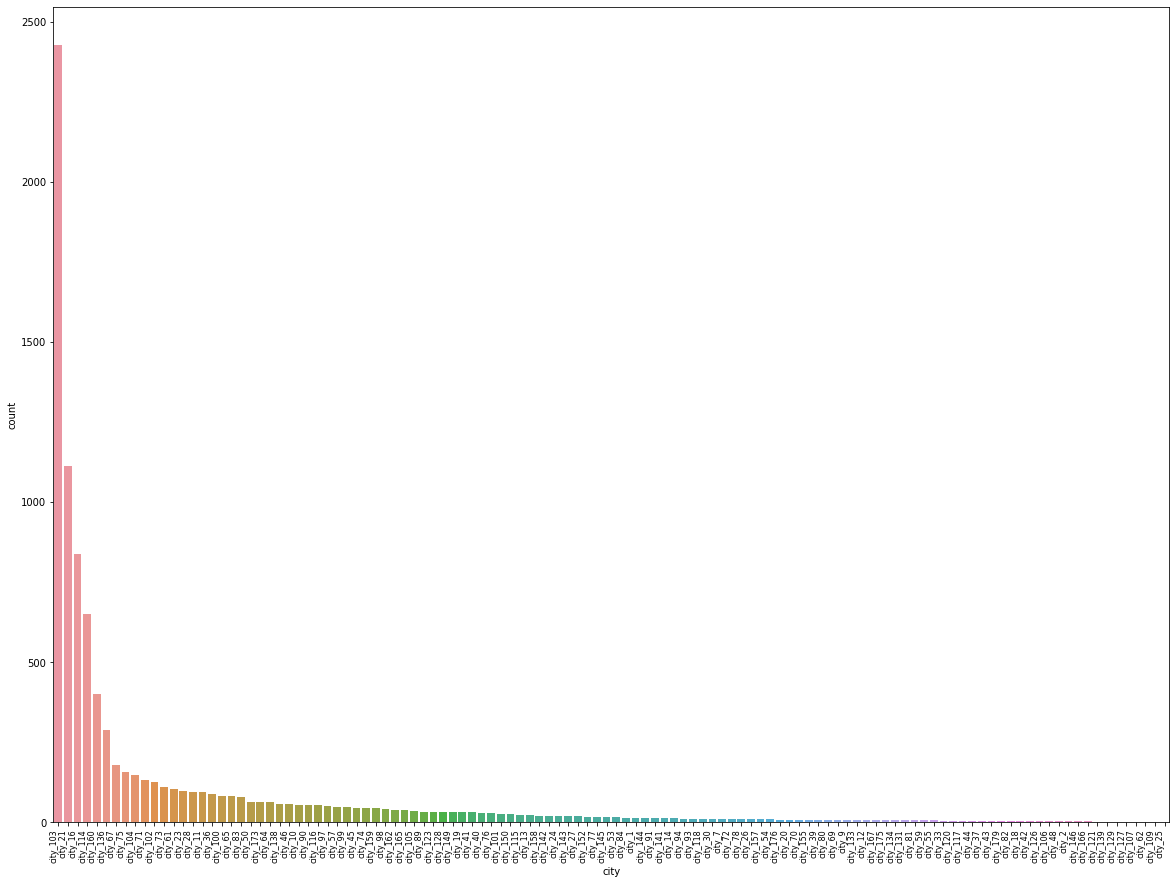

In [ ]:
x = hrdata['city']
plt.figure(figsize = (20, 15))
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize=8)
sns.countplot(x, order=hrdata['city'].value_counts().index)

In [ ]:
#getting top 4 cities 

city_top = hrdata[hrdata.city == 'city_103'].shape[0] + hrdata[hrdata.city == 'city_21'].shape[0] + hrdata[hrdata.city == 'city_16'].shape[0] + hrdata[hrdata.city == 'city_114'].shape[0]
city_top

5021

In [ ]:
#Remaining rows

print(hrdata['city'].shape[0] - city_top)

3934


In [ ]:
#Replacing with city_others

newSet = set(hrdata['city'])
 
newSet.remove('city_114')
newSet.remove('city_21')
newSet.remove('city_16')
newSet.remove('city_103')

hrdata.loc[hrdata['city'].isin(newSet), 'city'] = 'city_others'
newSet

{'city_1',
 'city_10',
 'city_100',
 'city_101',
 'city_102',
 'city_104',
 'city_105',
 'city_106',
 'city_107',
 'city_109',
 'city_11',
 'city_115',
 'city_116',
 'city_117',
 'city_118',
 'city_12',
 'city_120',
 'city_121',
 'city_123',
 'city_126',
 'city_127',
 'city_128',
 'city_129',
 'city_13',
 'city_131',
 'city_133',
 'city_134',
 'city_136',
 'city_138',
 'city_139',
 'city_14',
 'city_141',
 'city_142',
 'city_143',
 'city_144',
 'city_145',
 'city_146',
 'city_149',
 'city_150',
 'city_152',
 'city_155',
 'city_157',
 'city_158',
 'city_159',
 'city_160',
 'city_162',
 'city_165',
 'city_166',
 'city_167',
 'city_173',
 'city_175',
 'city_176',
 'city_179',
 'city_18',
 'city_19',
 'city_2',
 'city_20',
 'city_23',
 'city_24',
 'city_25',
 'city_26',
 'city_27',
 'city_28',
 'city_30',
 'city_33',
 'city_36',
 'city_37',
 'city_39',
 'city_40',
 'city_41',
 'city_42',
 'city_43',
 'city_44',
 'city_45',
 'city_46',
 'city_48',
 'city_50',
 'city_53',
 'city_54',
 'city_

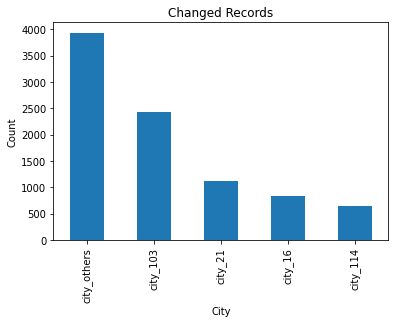

In [ ]:
#plotting sample data for changed records

hrdata['city'].value_counts().plot(kind='bar')
plt.title('Changed Records')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [ ]:
#Education Level

unq = set()

for i in hrdata['education_level']:
    unq.add(i)
unq

{'Graduate', 'Masters', 'Phd'}

In [ ]:
#Replacing edu level with Ordinal Values

level = {
    'Graduate': 0,
    'Masters' : 1,
    'Phd' : 2
}

convEdu = hrdata.replace({'education_level': level})
hrdata = convEdu

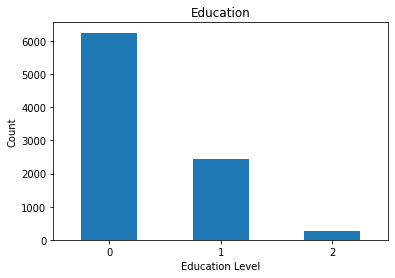

In [ ]:
#Show changes

hrdata['education_level'].value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontweight='light')
plt.title('Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [ ]:
#Company Size

unq = set()

for i in hrdata['company_size']:
    unq.add(i)
unq

{'10/49',
 '100-500',
 '1000-4999',
 '10000+',
 '50-99',
 '500-999',
 '5000-9999',
 '<10'}

In [ ]:
order = {'<10': 0, '10/49': 1, '50-99' : 2,'100-500':3, '500-999': 4,'1000-4999':5, '5000-9999':6, '10000+':7}
newSize = hrdata.replace({'company_size': order})
hrdata = newSize

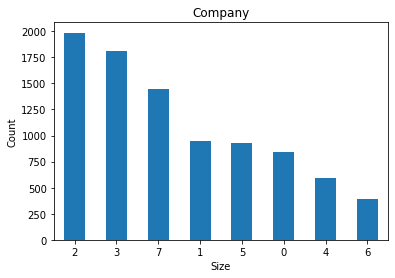

In [ ]:
#Show Changes

hrdata['company_size'].value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontweight='light')
plt.title('Company')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [ ]:
unq = set()

for i in hrdata['last_new_job']:
    unq.add(i)
unq

{'1', '2', '3', '4', '>4', 'never'}

In [ ]:
jobMap = {'never': 0, '1': 1, '2' : 2,'3':3, '4': 4,'>4':5}

lastNew = hrdata.replace({'last_new_job': jobMap})
hrdata = lastNew

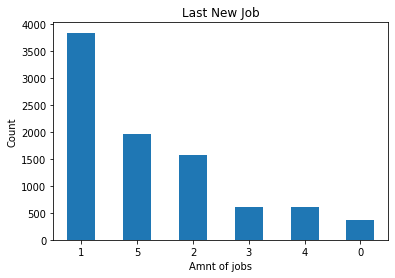

In [ ]:
hrdata['last_new_job'].value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontweight='light')
plt.title('Last New Job')
plt.xlabel('Amnt of jobs')
plt.ylabel('Count')
plt.show()

In [ ]:
#Rest of columns

comp = set() 
gen = set() 
ci = set() 
relexp = set()
enruni = set() 
mjdisc = set()

for i in hrdata['company_type']:
    comp.add(i)

for i in hrdata['gender']:
    gen.add(i)

for i in hrdata['city']:
    ci.add(i)

for i in hrdata['relevent_experience']:
    relexp.add(i)

for i in hrdata['enrolled_university']:
    enruni.add(i)

for i in hrdata['major_discipline']:
    mjdisc.add(i)

print(comp)
print(gen)
print(ci)
print(relexp)
print(enruni)
print(mjdisc)

{'Funded Startup', 'NGO', 'Other', 'Pvt Ltd', 'Public Sector', 'Early Stage Startup'}
{'Female', 'Male', 'Other'}
{'city_114', 'city_others', 'city_16', 'city_103', 'city_21'}
{'No relevent experience', 'Has relevent experience'}
{'Full time course', 'Part time course', 'no_enrollment'}
{'Other', 'Arts', 'STEM', 'Humanities', 'Business Degree', 'No Major'}


In [ ]:
#get_dummies for binary columns

hrdata = pd.get_dummies(data=hrdata, columns=['company_type', 'gender', 'city', 'relevent_experience', 'enrolled_university', 'major_discipline'])

In [ ]:
#Show top and last 5
hrdata.head()

,Unnamed: 0,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,...,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,1,29725,0.776,0,15.0,2,5,47,0.0,0,...,1,0,0,1,0,0,0,0,0,1
1,4,666,0.767,1,21.0,2,4,8,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,7,402,0.762,0,13.0,0,5,18,1.0,0,...,0,0,0,1,0,0,0,0,0,1
3,8,27107,0.920,0,7.0,2,1,46,1.0,0,...,0,0,0,1,0,0,0,0,0,1
4,11,23853,0.920,0,5.0,6,1,108,0.0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
hrdata.tail()

,Unnamed: 0,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,...,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
8950,19147,21319,0.624,0,1.0,3,1,52,1.0,0,...,1,1,0,0,0,0,0,0,0,1
8951,19149,251,0.920,1,9.0,2,1,36,1.0,0,...,0,0,0,1,0,0,0,0,0,1
8952,19150,32313,0.920,0,10.0,3,3,23,0.0,0,...,0,0,0,1,0,0,0,0,0,1
8953,19152,29754,0.920,0,7.0,1,1,25,0.0,0,...,0,0,0,1,0,0,1,0,0,0
8954,19155,24576,0.920,0,21.0,2,4,44,0.0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Show the shape of the new table

hrdata.shape

(8955, 34)

In [ ]:
#Drop Enrollee ID and duplicates

hrdata = hrdata.drop('enrollee_id', axis=1)

In [ ]:
#Feature Scaling
scaler = MinMaxScaler()
col = hrdata.columns
data_scale = scaler.fit_transform(hrdata.to_numpy())
data_scale = pd.DataFrame(data_scale, columns = col)

data_scale.head()

,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,company_type_Funded Startup,...,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,0.000000,0.654691,0.0,0.714286,0.285714,1.0,0.137313,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000157,0.636727,0.5,1.000000,0.285714,0.8,0.020896,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000313,0.626747,0.0,0.619048,0.000000,1.0,0.050746,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000365,0.942116,0.0,0.333333,0.285714,0.2,0.134328,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000522,0.942116,0.0,0.238095,0.857143,0.2,0.319403,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Move target to last column

data_scale = data_scale.loc[:, data_scale.columns != 'target']
data_scale['target'] = hrdata['target']
data_scale.head()


,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,...,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,target
0,0.000000,0.654691,0.0,0.714286,0.285714,1.0,0.137313,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000157,0.636727,0.5,1.000000,0.285714,0.8,0.020896,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000313,0.626747,0.0,0.619048,0.000000,1.0,0.050746,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.000365,0.942116,0.0,0.333333,0.285714,0.2,0.134328,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.000522,0.942116,0.0,0.238095,0.857143,0.2,0.319403,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 3. X/Y and Training/Test Split with stratified sampling and SMOTE

In [ ]:
#Copy all features into X and target into Y

X = hrdata[['city_development_index', 'education_level', 'experience',
'company_size', 'last_new_job', 'training_hours',
'company_type_Early Stage Startup', 'company_type_Funded Startup',
'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
'company_type_Pvt Ltd', 'major_discipline_Arts',
'major_discipline_Business Degree', 'major_discipline_Humanities',
'major_discipline_No Major', 'major_discipline_Other',
'major_discipline_STEM', 'enrolled_university_Full time course',
'enrolled_university_Part time course',
'enrolled_university_no_enrollment',
'relevent_experience_Has relevent experience',
'relevent_experience_No relevent experience', 'gender_Female',
'gender_Male', 'gender_Other', 'city_city_103', 'city_city_114',
'city_city_16', 'city_city_21', 'city_city_others']]

Y = hrdata[['target']]

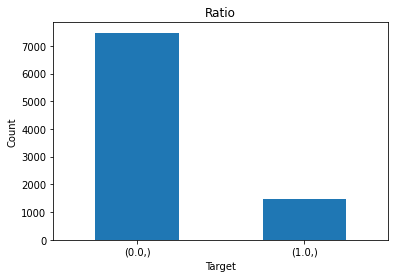

In [ ]:
#Show the ratio of 1 and 0 in Y

Y.value_counts().plot(kind='bar')
plt.title('Ratio')
plt.xticks(rotation=0, fontweight='light')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
#Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state = 0)

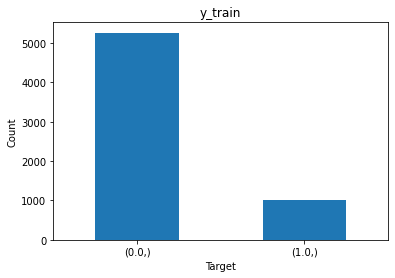

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontweight='light')
plt.title('y_train')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

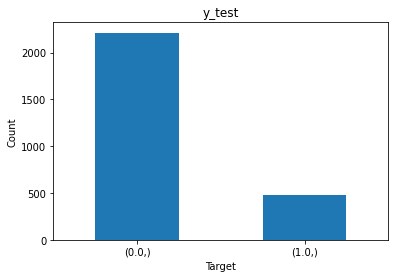

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontweight='light')
plt.title('y_test')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
X_scaled, y_scaled = SMOTE().fit_resample(X_train, y_train)

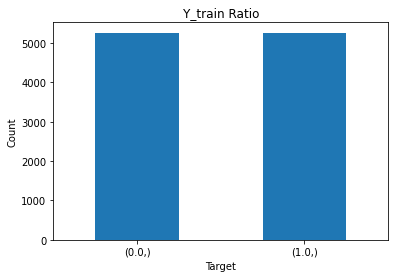

In [ ]:
y_scaled.value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontweight='light')
plt.title('Y_train Ratio')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#4. PCA and Logistic Regression



{'boxes': [<matplotlib.lines.Line2D at 0x7fe9d5803fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9d5820d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9d5800210>,
 'means': [<matplotlib.lines.Line2D at 0x7fe9d5800a90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe9d58008d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe9d810f990>,
  <matplotlib.lines.Line2D at 0x7fe9d5567750>]}

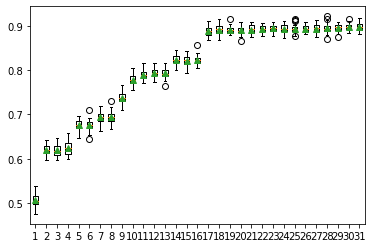

In [ ]:
#Logistical Regression Model with Make_Pipeline

features = list(range(1,X.shape[1]+1))
model_s = []
for i in features:
  step = make_pipeline(PCA(n_components=i), LogisticRegression())
  RS = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
  scores = cross_val_score(step, X_scaled, y_scaled, scoring='accuracy', cv=RS, n_jobs=-1)
  model_s.append(scores)

plt.boxplot(model_s, showmeans=True)

In [ ]:
#PCA and Logistic Regression

steps = [('pca', PCA(n_components=19)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
model.fit(X_scaled, y_scaled)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.84108671380722

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2062,  150],
       [ 277,  198]])

In [ ]:
precision_score(y_test, y_pred)

0.5689655172413793

In [ ]:
recall_score(y_test, y_pred)

0.4168421052631579

In [ ]:
f1_score(y_test, y_pred)

0.48116646415552855

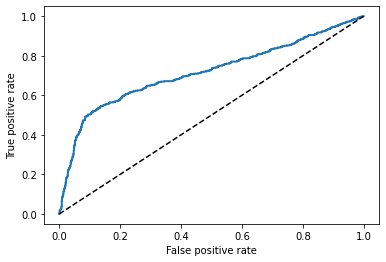

In [ ]:
y_pred = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
#Show ROC Score
roc_auc_score(y_test, y_pred)

0.7164047777672028

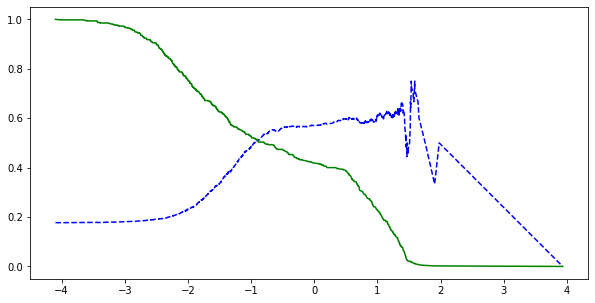

In [ ]:
#Precision Recall Curve Plot
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# 5. Softmaxt regression:
<hr>
1.   How softmax regression is related to logistic regression? What library can you use for softmax regression?

### Softmax Regression is a generalization of Logistic Regression and uses k dimensionality to summarize a vector of arbitrary values bounded in a binary range.

### We can use TensorFlow for softmax regression

# 6. KNN <b style="color:red">(Always use rebalanced training set for training, if it is not specified which training set to use)</b>
<hr>
<ol type="1">
  <li> Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report </li>

  <li> Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report </li>

  <li> Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy based on the example available at <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#:~:text=Plotting%20the%20result-,Demonstration%20of%20multi-">Link to Sklearn</a>
  
  Link to sklearn (Links to an external site.). Also some helpful links and codes: <a href="https://github.com/oguzhankir/Hyperparameter_Tuning/tree/main/Knn_tuning">GitHub Example</a>
  and <a href="https://www.youtube.com/watch?v=TvB_3jVIHhg">Youtube Video</a>
  </li>
 
  <li> The above grid search process can take a couple of minutes. After completing the process, print the best_params_ </li>

  <li> Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC. </li>

  <li> Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC.</li>
  
  <li> A short discussion on the 4 models and their differences. </li>
</ol>

In [ ]:
#KNN based on unbalanced set

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2197   15]
 [ 466    9]]
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      2212
         1.0       0.38      0.02      0.04       475

    accuracy                           0.82      2687
   macro avg       0.60      0.51      0.47      2687
weighted avg       0.75      0.82      0.75      2687



In [ ]:
# KNN based on balanced set

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_scaled, y_scaled)
y_pred = classifier.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0. 0. 0. ... 1. 0. 0.]
[[1455  757]
 [ 253  222]]
              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74      2212
         1.0       0.23      0.47      0.31       475

    accuracy                           0.62      2687
   macro avg       0.54      0.56      0.52      2687
weighted avg       0.74      0.62      0.67      2687



In [ ]:
#Using Grid Search 

knn_params = {
"n_neighbors": range(1, 10),
"weights": ["uniform", "distance"],
"metric": ["euclidean", "manhattan", "minkowski"]
}
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=3, scoring=scoring, refit="AUC", return_train_score=True)
grid_results = grid_search.fit(X_scaled, y_scaled)
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_scaled, y_scaled)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77      2212
         1.0       0.26      0.49      0.34       475

    accuracy                           0.66      2687
   macro avg       0.56      0.59      0.55      2687
weighted avg       0.76      0.66      0.69      2687

[[1541  671]
 [ 242  233]]
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
#After Grid Search
print(grid_results.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
#Train the model after grid search

classifier = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='manhattan')
classifier.fit(X_scaled, y_scaled)
y_pred = classifier.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1. 0. 0. ... 1. 1. 0.]
[[1481  731]
 [ 220  255]]
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76      2212
         1.0       0.26      0.54      0.35       475

    accuracy                           0.65      2687
   macro avg       0.56      0.60      0.55      2687
weighted avg       0.76      0.65      0.68      2687



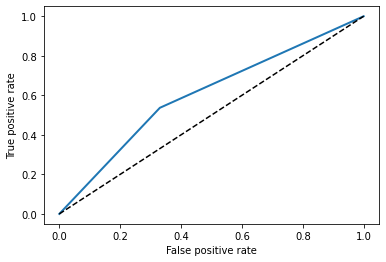

In [ ]:
#plotting ROC curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.603185971257257

In [ ]:
#using PCA to train model

pca = KNeighborsClassifier()
pca.fit(X_scaled, y_scaled)
y_pred = pca.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0. 0. 0. ... 1. 1. 0.]
[[1452  760]
 [ 258  217]]
              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74      2212
         1.0       0.22      0.46      0.30       475

    accuracy                           0.62      2687
   macro avg       0.54      0.56      0.52      2687
weighted avg       0.74      0.62      0.66      2687



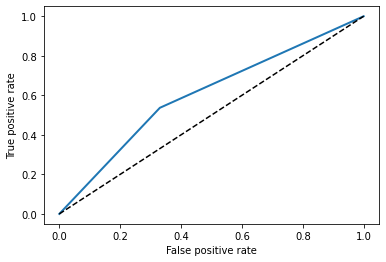

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.5566308175502047

# 7. Naive Bayes

In [ ]:
#Training a model with GaussianNB

gnb = GaussianNB()
gnb.fit(X_scaled, y_scaled)
y_pred= gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1151 1061]
 [ 155  320]]
              precision    recall  f1-score   support

         0.0       0.88      0.52      0.65      2212
         1.0       0.23      0.67      0.34       475

    accuracy                           0.55      2687
   macro avg       0.56      0.60      0.50      2687
weighted avg       0.77      0.55      0.60      2687



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


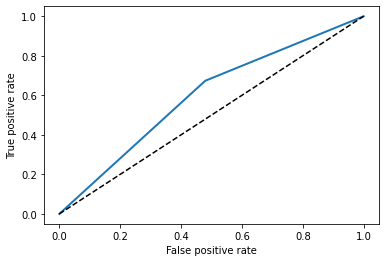

In [ ]:
#Plotting and printing ROC Curve

y_pred = gnb.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.5970138954982392

In [ ]:
# counting misclassification
y_pred = gnb.predict(X_test)
y_new=np.ravel(y_test)
p = (y_new)!= (y_pred)
print(p.sum())

1216


In [ ]:
#Train with CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_scaled, y_scaled)
y_pred= cnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1968  244]
 [ 254  221]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2212
         1.0       0.48      0.47      0.47       475

    accuracy                           0.81      2687
   macro avg       0.68      0.68      0.68      2687
weighted avg       0.81      0.81      0.81      2687



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


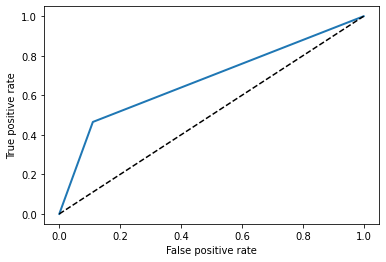

In [ ]:
y_pred = cnb.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.6774778718949271

In [ ]:
# counting misclassification
y_pred = gnb.predict(X_test)
y_new=np.ravel(y_test)
p = (y_new)!= (y_pred)
print(p.sum())

1216


# 8. Support Vector Machine 

In [ ]:
#Building support vector machine using SVC and Grid Search

model = SVC(kernel = 'sigmoid')
param_grid = {'C': [0.1,1, 10, 100]}
grid = GridSearchCV(SVC(probability=True, random_state=1), param_grid, n_jobs=-1, refit=True, verbose=1)
grid.fit(X_scaled,y_scaled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(probability=True, random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=1)

In [ ]:
,grid.best_params_

{'C': 100}

In [ ]:
#Testing the model

model = SVC(kernel = 'rbf', C=100) 
model.fit(X_scaled, y_scaled)
y_pred= model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2080  132]
 [ 277  198]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2212
         1.0       0.60      0.42      0.49       475

    accuracy                           0.85      2687
   macro avg       0.74      0.68      0.70      2687
weighted avg       0.83      0.85      0.84      2687



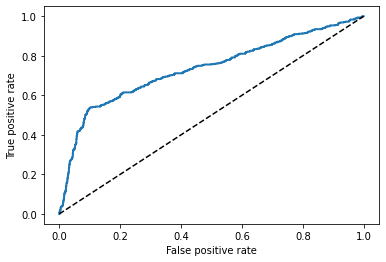

In [ ]:
y_pred = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.7344670219853431

# 9. Decision Tree 
<hr>
<ol type="1">
  <li> Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the <b> count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize) </b> </li>

  <li> Perform the same tasks as 9.1 with the balanced training set </li>
  <li> Discuss any difference and also discuss part of the tree of 9.2 </li> 
</ol>

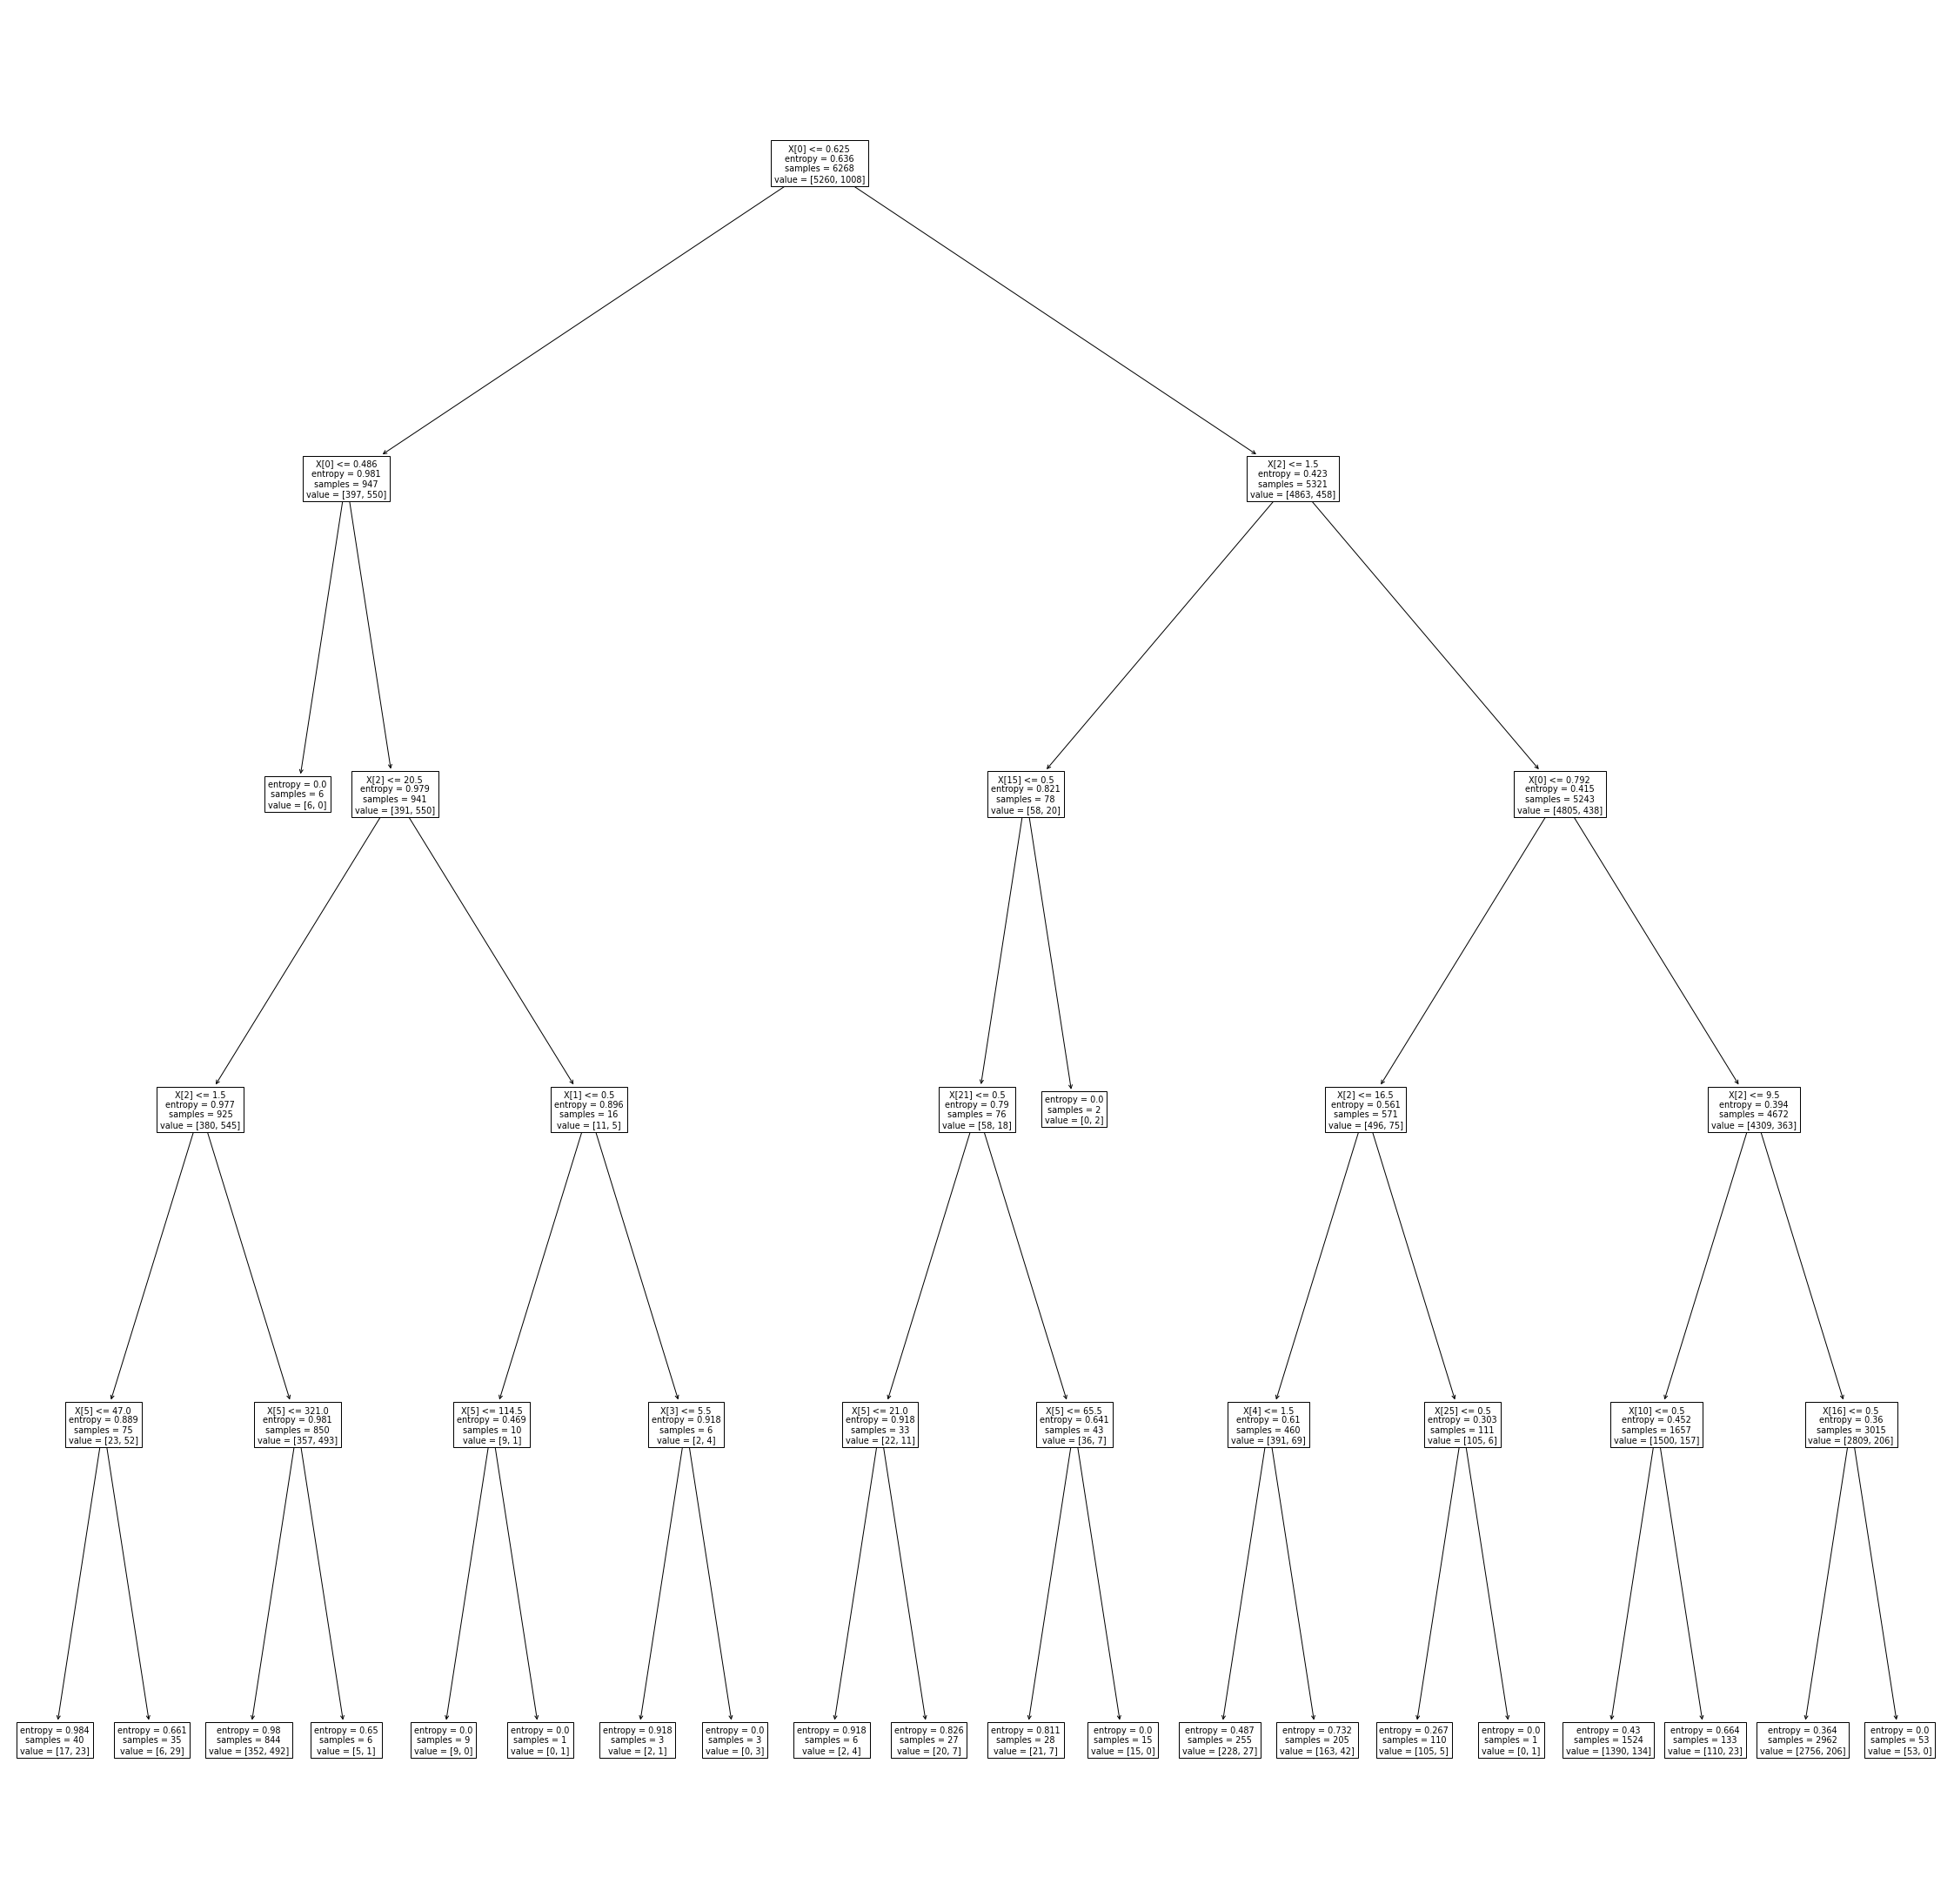

In [ ]:
#Decision tree model with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, criterion="entropy")
tree_clf.fit(X_train, y_train)
plt.figure(figsize = (40,40))
tree.plot_tree(tree_clf)
plt.show()

In [ ]:
y_pred= tree_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2045  167]
 [ 228  247]]
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      2212
         1.0       0.60      0.52      0.56       475

    accuracy                           0.85      2687
   macro avg       0.75      0.72      0.73      2687
weighted avg       0.85      0.85      0.85      2687



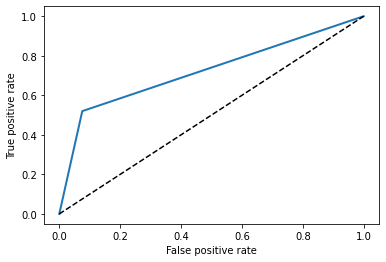

In [ ]:
y_pred = tree_clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)
y_new=np.ravel(y_test)
p = (y_new)!= (y_pred)
print(p.sum())

395


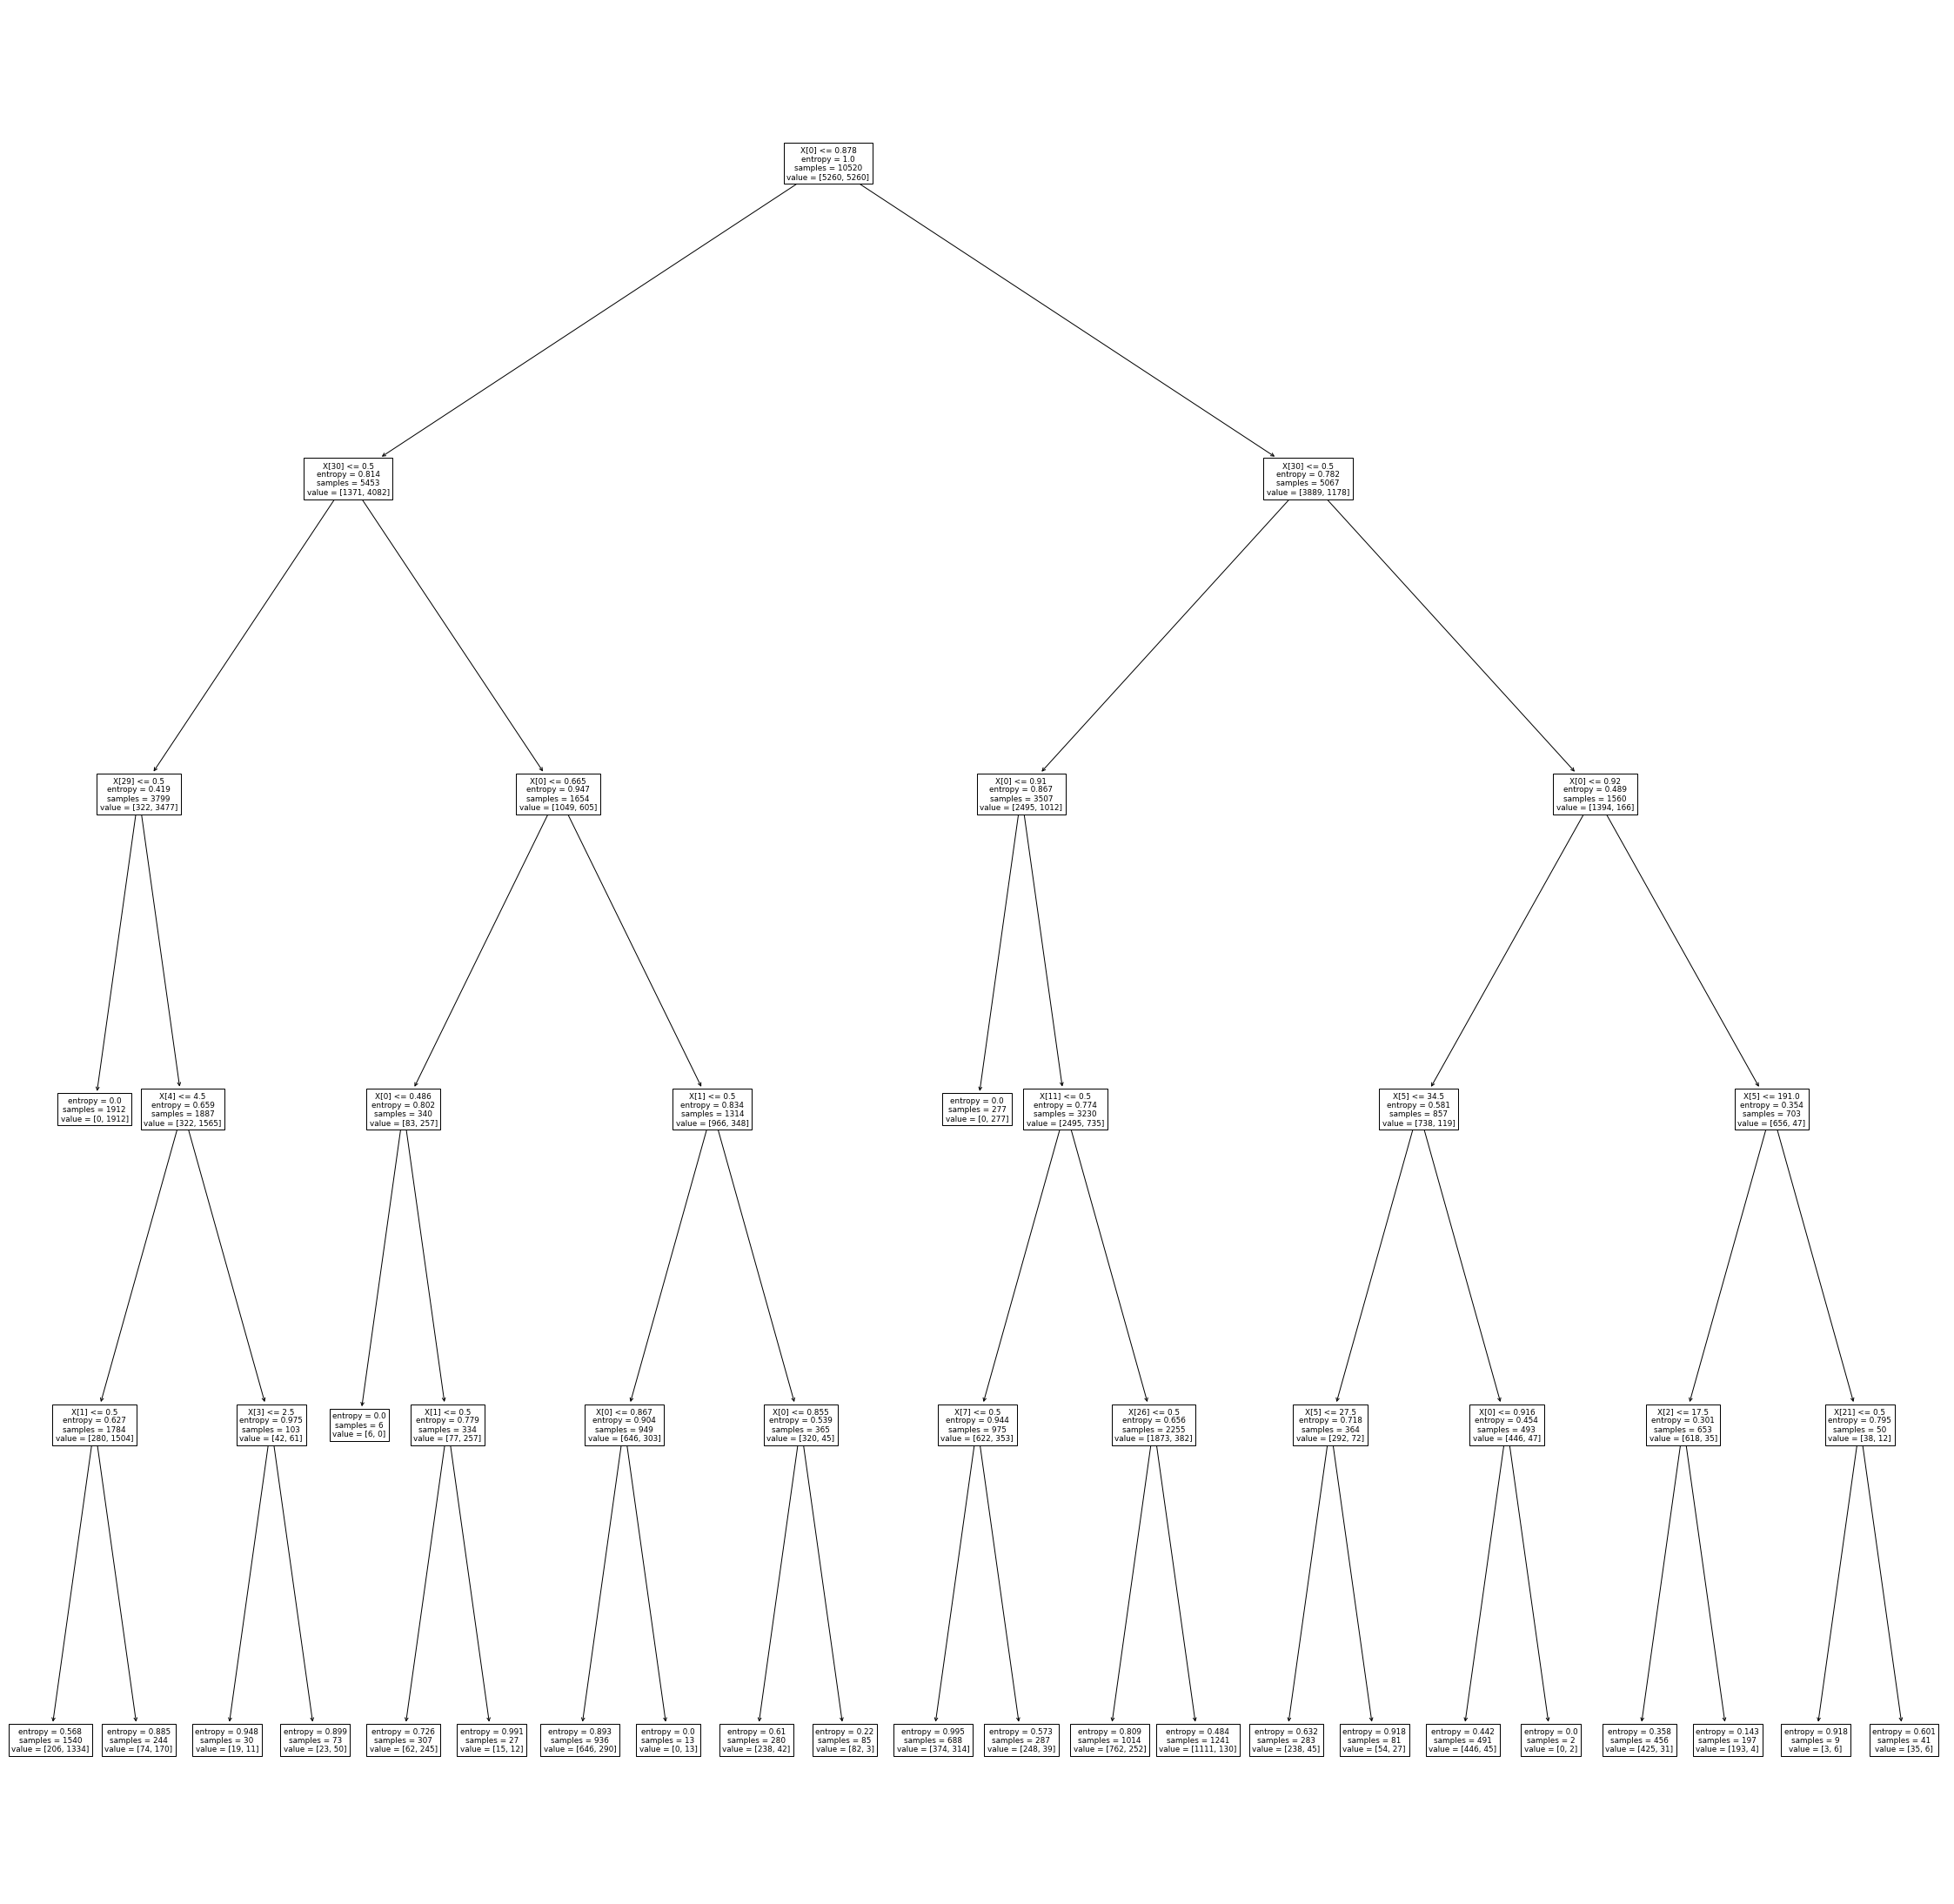

In [ ]:
#Now with balanced dataset

tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, criterion='entropy')
tree_clf.fit(X_scaled, y_scaled)
plt.figure(figsize = (40,40))
tree.plot_tree(tree_clf)
plt.show()

In [ ]:
y_pred= tree_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2054  158]
 [ 236  239]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      2212
         1.0       0.60      0.50      0.55       475

    accuracy                           0.85      2687
   macro avg       0.75      0.72      0.73      2687
weighted avg       0.84      0.85      0.85      2687



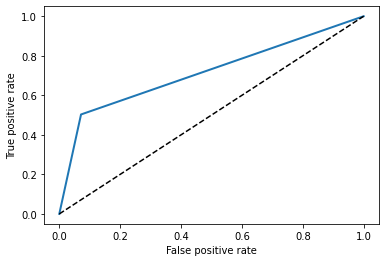

In [ ]:
y_pred = tree_clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.7158646616541354

In [ ]:
y_new=np.ravel(y_test)
p = (y_new)!= (y_pred)
print(p.sum())

394


#Discuss any difference and also discuss part of the tree of 9.2

AUC is different between trees used. Also the balanced dataset seems to make the tree look more even.

# 10. Random Forest 

In [ ]:
# Grid Search with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

gridSearch = GridSearchCV(estimator=rf, param_grid=param)
gridSearch.fit(X_scaled, y_scaled)
gridSearch.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=20, min_samples_leaf=5, n_estimators=100, n_jobs=-1)
rf.fit(X_scaled, y_scaled)
y_pred= rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2055  157]
 [ 235  240]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      2212
         1.0       0.60      0.51      0.55       475

    accuracy                           0.85      2687
   macro avg       0.75      0.72      0.73      2687
weighted avg       0.85      0.85      0.85      2687



In [ ]:
roc_auc_score(y_test, y_pred)

0.7171433330160845

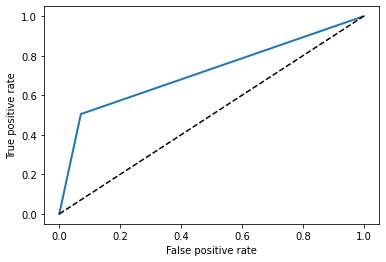

In [ ]:
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

# 11. Boosting Algorithms

In [ ]:
#Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. 
#Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
param = {
    'learning_rate': [.01, 0.2, 0.5, 0.7, 0.9, 1.0, 1.5],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

gSearch = GridSearchCV(estimator=ada, param_grid=param, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
gSearch.fit(X_scaled, y_scaled)
grid_search.best_estimator_


Fitting 3 folds for each of 42 candidates, totalling 126 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [ ]:
ada = AdaBoostClassifier(random_state=42, learning_rate=0.5, n_estimators=200)
ada.fit(X_scaled, y_scaled)
y_pred= ada.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2053  159]
 [ 228  247]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      2212
         1.0       0.61      0.52      0.56       475

    accuracy                           0.86      2687
   macro avg       0.75      0.72      0.74      2687
weighted avg       0.85      0.86      0.85      2687



In [ ]:
roc_auc_score(y_test, y_pred)

0.7240596745027125

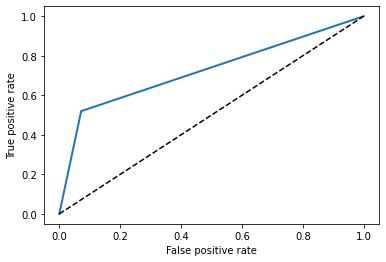

In [ ]:
y_pred = ada.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
y_new = np.ravel(y_test)
p = (y_new) != (y_pred)
print(p.sum())

387


In [ ]:
#Gradient BoostingClassifier 
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(random_state=42)
param = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'n_estimators' : [10, 25, 30, 50, 100, 200],
    'max_depth'    : [3, 5, 7]
}

gSearch = GridSearchCV(estimator = grad, cv = 3, param_grid = param, n_jobs=-1, scoring='accuracy')
gSearch.fit(X_scaled, y_scaled)
gSearch.best_estimator_



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.075, max_depth=7, random_state=42)

In [ ]:
roc_auc_score(y_test, y_pred)

0.7240596745027125

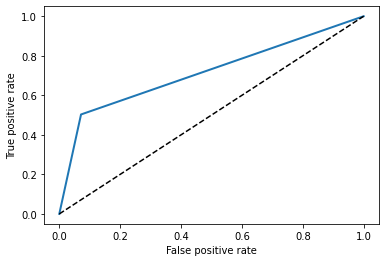

In [ ]:
y_pred = tree_clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
y_new = np.ravel(y_test)
p = (y_new) != (y_pred)
print(p.sum())

394


# 12. Final Discussion
<hr>

Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.

## A Decision Tree could be pretty useful in both visualizing and determining a set of variables which could lead to scenarios where an employee might look for a new job. 